## Conv Daily data to monthly
USE IQR Monthly method to convert data to monthly and add error bars


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


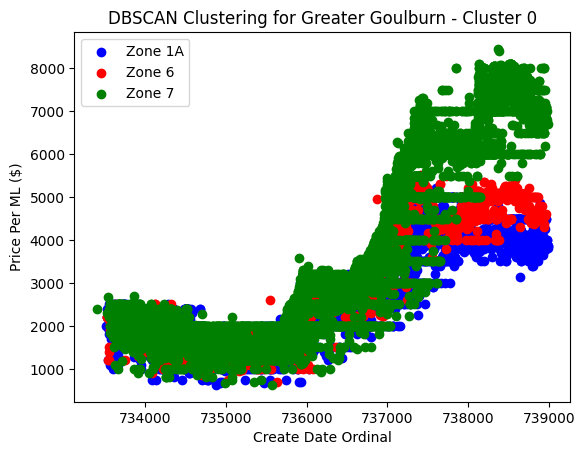

In [42]:
# Get file path
FILE_PATH_zonedata1a = "../zone_data_1A_clustered.csv"
FILE_PATH_zonedata6 = "../zone_data_6_clustered.csv"
FILE_PATH_zonedata7 = "../zone_data_7_clustered.csv"

# Read the file
df_1a = pd.read_csv(FILE_PATH_zonedata1a)
df_6 = pd.read_csv(FILE_PATH_zonedata6)
df_7 = pd.read_csv(FILE_PATH_zonedata7)

# Filter the DataFrame for entries in Cluster 0
cluster_0_data_1a = df_1a[df_1a['Cluster'] == 0]
cluster_0_data_6 = df_6[df_6['Cluster'] == 0]
cluster_0_data_7 = df_7[df_7['Cluster'] == 0]

# Plot the data for Cluster 0 for each zone
plt.scatter(cluster_0_data_1a['Create_date_ordinal'], cluster_0_data_1a['Price Per ML ($)'], color='b', label='Zone 1A')
plt.scatter(cluster_0_data_6['Create_date_ordinal'], cluster_0_data_6['Price Per ML ($)'], color='r', label='Zone 6')
plt.scatter(cluster_0_data_7['Create_date_ordinal'], cluster_0_data_7['Price Per ML ($)'], color='g', label='Zone 7')
plt.title("DBSCAN Clustering for Greater Goulburn - Cluster 0")
plt.xlabel('Create Date Ordinal')
plt.ylabel('Price Per ML ($)')
plt.legend()
plt.show()

        Status Application Creation Date Approved / Refused Date  \
3986  Recorded                23/12/2008              12/07/2010   
9094  Recorded                30/04/2009              16/06/2009   
3163  Recorded                12/05/2009              13/05/2009   
6874  Recorded                12/05/2009              27/05/2009   
4153  Recorded                18/05/2009              05/06/2009   
...        ...                       ...                     ...   
7747  Recorded                21/03/2024              27/03/2024   
9817  Recorded                28/03/2024              04/04/2024   
7688  Recorded                02/04/2024              04/04/2024   
5571  Recorded                04/04/2024              12/04/2024   
666   Recorded                09/04/2024              16/04/2024   

     Recorded / Rejected Date Water Share ID Water System Source Reliability  \
3986               23/07/2010      WEE****38              Murray        High   
9094               20/0

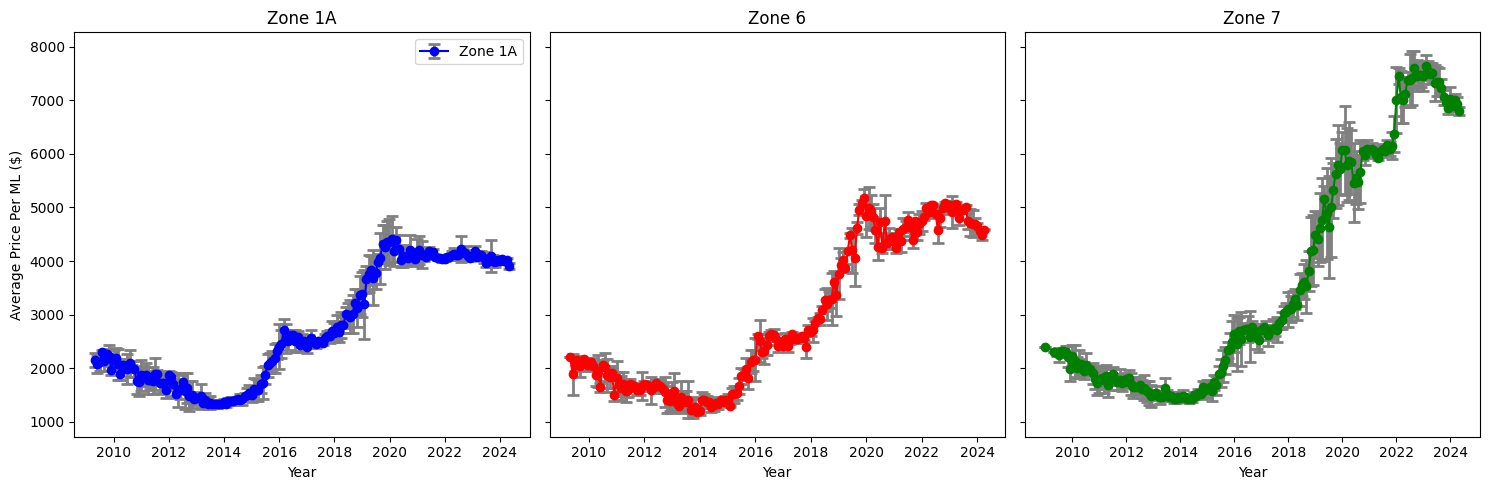

Data saved to zone_data_1A_PRICE_MONTHLY.csv
Data saved to zone_data_6_PRICE_MONTHLY.csv
Data saved to zone_data_7_PRICE_MONTHLY.csv


In [43]:
# Convert 'Create_date' to datetime
df_1a['Create_date'] = pd.to_datetime(df_1a['Create_date'])
df_6['Create_date'] = pd.to_datetime(df_6['Create_date'])
df_7['Create_date'] = pd.to_datetime(df_7['Create_date'])

df_1a = df_1a.sort_values(by='Create_date')
df_6 = df_6.sort_values(by='Create_date')
df_7 = df_7.sort_values(by='Create_date')

# Limit the DataFrame to the first 1000 rows after sorting
#df = df.iloc[:9000]

# Filter the DataFrame for entries in Cluster 0
cluster_0_data_1a = df_1a[df_1a['Cluster'] == 0]
cluster_0_data_6 = df_6[df_6['Cluster'] == 0]
cluster_0_data_7 = df_7[df_7['Cluster'] == 0]

print(cluster_0_data_7)

# Group by month and calculate mean and IQR
monthly_data_1a = cluster_0_data_1a.resample('M', on='Create_date').agg({
    'Price Per ML ($)': ['mean', lambda x: np.percentile(x, 75) - np.percentile(x, 25)]
})
monthly_data_6 = cluster_0_data_6.resample('M', on='Create_date').agg({
    'Price Per ML ($)': ['mean', lambda x: np.percentile(x, 75) - np.percentile(x, 25)]
})
# Check if the DataFrame is empty
if not cluster_0_data_7.empty:
    monthly_data_7 = cluster_0_data_7.resample('M', on='Create_date').agg({
        'Price Per ML ($)': ['mean', lambda x: np.percentile(x, 75) - np.percentile(x, 25) if len(x) > 0 else np.nan]
    })
    monthly_data_7.columns = ['mean', 'IQR']  # Rename the columns for clarity
else:
    print("No data available for Zone 7 in Cluster 0")


monthly_data_1a.columns = ['mean', 'IQR']  # Rename the columns for clarity
monthly_data_6.columns = ['mean', 'IQR']  # Rename the columns for clarity
monthly_data_7.columns = ['mean', 'IQR']  # Rename the columns for clarity


# Drop months with NaN values if any
monthly_data_1a = monthly_data_1a.dropna()
monthly_data_6 = monthly_data_6.dropna()
monthly_data_7 = monthly_data_7.dropna()

print(monthly_data_7)

# Plot the data for all three zones with IQR error bars
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for Zone 1A
axs[0].errorbar(monthly_data_1a.index, monthly_data_1a['mean'], 
                yerr=monthly_data_1a['IQR']/2, fmt='-o', color='b', label='Zone 1A',
                ecolor='gray', elinewidth=2, capsize=4, capthick=2)
axs[0].set_title("Zone 1A")
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Price Per ML ($)')


# Plot for Zone 6
axs[1].errorbar(monthly_data_6.index, monthly_data_6['mean'], 
                yerr=monthly_data_6['IQR']/2, fmt='-o', color='r', label='Zone 6',
                ecolor='gray', elinewidth=2, capsize=4, capthick=2)
axs[1].set_title("Zone 6")
axs[1].set_xlabel('Year')

# Plot for Zone 7
axs[2].errorbar(monthly_data_7.index, monthly_data_7['mean'], 
                yerr=monthly_data_7['IQR']/2, fmt='-o', color='g', label='Zone 7',
                ecolor='gray', elinewidth=2, capsize=4, capthick=2)
axs[2].set_title("Zone 7")
axs[2].set_xlabel('Year')

# Display the plot
plt.tight_layout()
plt.show()

# Flatten
monthly_data_1a.columns = ['mean', 'IQR']
monthly_data_6.columns = ['mean', 'IQR']
monthly_data_7.columns = ['mean', 'IQR']

# Reset the index to make 'Create_date' a column and rename it to 'Date'
monthly_data_1a.reset_index(inplace=True)
monthly_data_1a.rename(columns={'Create_date': 'date'}, inplace=True)

monthly_data_6.reset_index(inplace=True)
monthly_data_6.rename(columns={'Create_date': 'date'}, inplace=True)

monthly_data_7.reset_index(inplace=True)
monthly_data_7.rename(columns={'Create_date': 'date'}, inplace=True)
# Convert the DataFrame to CSV

output_csv_path_1a = "zone_data_1A_PRICE_MONTHLY.csv"
monthly_data_1a.to_csv(output_csv_path_1a)
print(f"Data saved to {output_csv_path_1a}")

output_csv_path_6 = "zone_data_6_PRICE_MONTHLY.csv"
monthly_data_6.to_csv(output_csv_path_6)
print(f"Data saved to {output_csv_path_6}")

output_csv_path_7 = "zone_data_7_PRICE_MONTHLY.csv"
monthly_data_7.to_csv(output_csv_path_7)
print(f"Data saved to {output_csv_path_7}")


# Do similar with volume Traded

In [ ]:
# Assuming the column for volume traded is named 'Volume Traded'
monthly_volume_1a = cluster_0_data_1a.resample('M', on='Create_date').agg({
    'Volume Traded (ML)': ['mean', lambda x: np.percentile(x, 75) - np.percentile(x, 25)]
})
monthly_volume_6 = cluster_0_data_6.resample('M', on='Create_date').agg({
    'Volume Traded (ML)': ['mean', lambda x: np.percentile(x, 75) - np.percentile(x, 25)]
})
if not cluster_0_data_7.empty:
    monthly_volume_7 = cluster_0_data_7.resample('M', on='Create_date').agg({
        'Volume Traded (ML)': ['mean', lambda x: np.percentile(x, 75) - np.percentile(x, 25) if len(x) > 0 else np.nan]
    })
    monthly_volume_7.columns = ['mean', 'IQR']  # Rename the columns for clarity
else:
    print("No data available for Zone 7 in Cluster 0")

monthly_volume_1a.columns = ['mean', 'IQR']
monthly_volume_6.columns = ['mean', 'IQR']
monthly_volume_7.columns = ['mean', 'IQR']

# Drop months with NaN values if any
monthly_volume_1a = monthly_volume_1a.dropna()
monthly_volume_6 = monthly_volume_6.dropna()
monthly_volume_7 = monthly_volume_7.dropna()